<a href="https://colab.research.google.com/github/MalihehGaroosiha/Capstone-project/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, I am applying content-based recommender systems method to the Netflix dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
import plotly.express as px

In [3]:
import os
os.getcwd()

'/content'

#Uploading Dataset

In [5]:
from google.colab import files
uploaded=files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [6]:
df=pd.read_csv("netflix_titles.csv")

In [7]:
df_orig = df.copy()

In [8]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [9]:
df.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


#Finding data type

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


##Descriptive statistics for numeric columns

In [11]:
print(df.describe())

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


#number of rows and columns

In [12]:
df.shape

(8807, 12)

# Exploring Dataset
1.Finding columns with missing values:director,cast, country,date_added,rating, duration

In [13]:
df.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

#List of columns name

In [14]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# Unique variables values with plots

In [15]:
df.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1190,s1191,Movie,Skylines,Liam O'Donnell,"Lindsey Morgan, Jonathan Howard, Daniel Bernha...","United Kingdom, United States","March 18, 2021",2020,R,113 min,Action & Adventure,When a mysterious alien virus begins to endang...


In [16]:
df["release_year"].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

<Axes: >

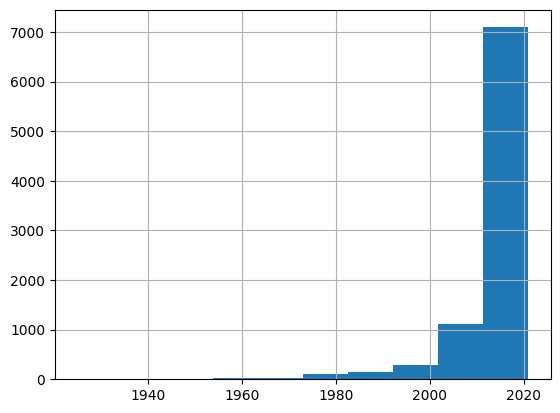

In [17]:
df["release_year"].hist()

#for the country bar chart, the primary country selected


In [ ]:
df["country"].unique()

In [19]:
df["country"].nunique()

748

In [20]:
import numpy as np

# Define a function to split the country values
def split_country(x):
    if isinstance(x, str):  # Check if x is a string
        return x.split(',')[0]
    elif isinstance(x, float) and np.isnan(x):  # Check if x is NaN
        return np.nan
    else:
        return x  # Return the original value if it's not a string or NaN

# Apply the split_country function to the 'country' column
df_orig ['country'] = df_orig ['country'].apply(split_country)

In [21]:
df_orig ["country"].nunique()

86

In [22]:
orginal_country_count=df_orig ["country"].value_counts()
orginal_country_count

country
United States     3211
India             1008
United Kingdom     628
Canada             271
Japan              259
                  ... 
Namibia              1
Senegal              1
Luxembourg           1
Syria                1
Somalia              1
Name: count, Length: 86, dtype: int64

<Axes: xlabel='country'>

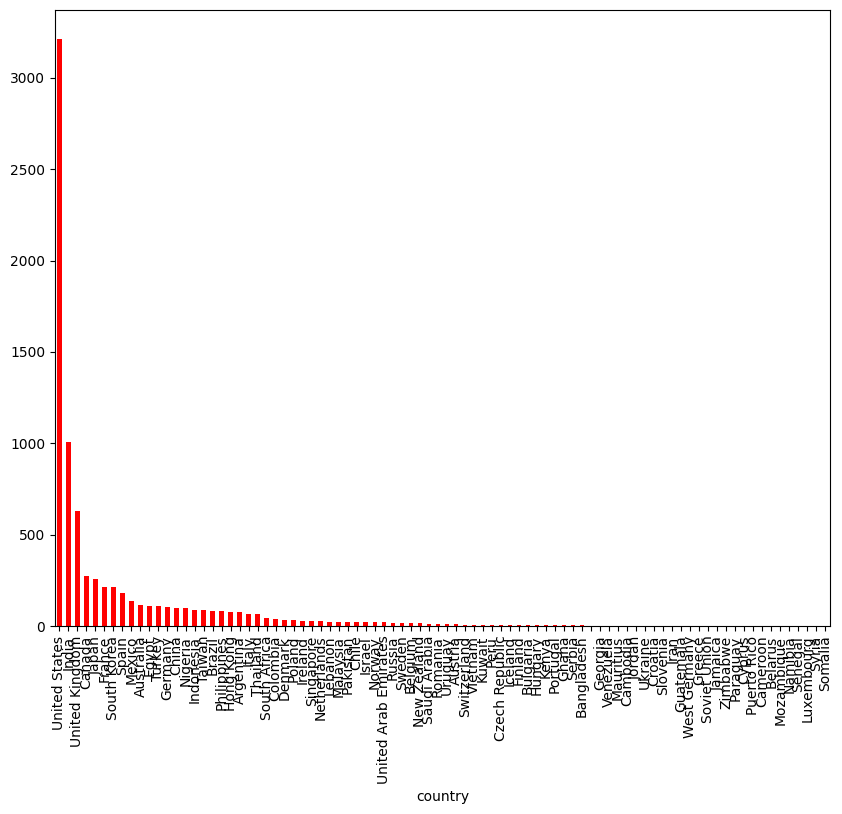

In [23]:
plt.figure(figsize=(10, 8))

orginal_country_count.plot(kind='bar', color='red')

Cheking rating from https://help.netflix.com/en/node/2064/ca.

In [24]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [26]:
df["rating"].nunique()

17

In [25]:
rating_count=df["rating"].value_counts()
rating_count

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

<Axes: xlabel='rating'>

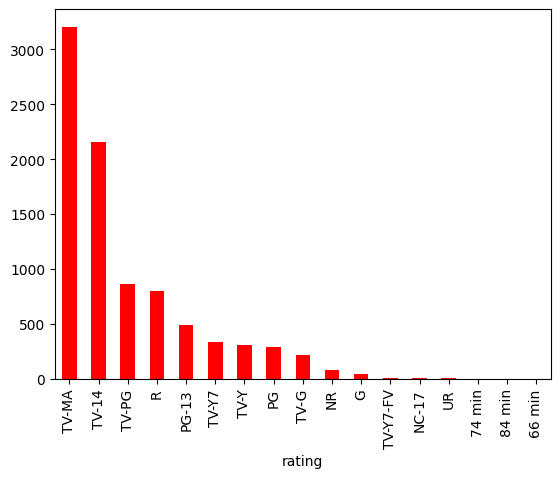

In [27]:
rating_count.plot(kind='bar', color='red')


In [28]:
df["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [29]:
type_count= df["type"].value_counts()

Text(0.5, 1.0, 'Type')

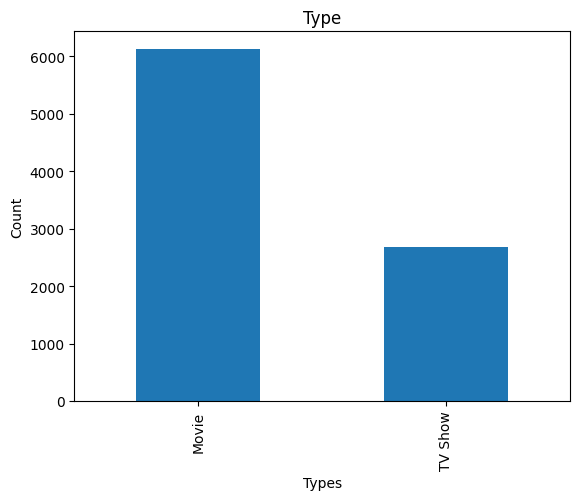

In [30]:
type_count.plot(kind='bar')
plt.xlabel('Types')
plt.ylabel('Count')
plt.title('Bar Plot of Type Counts')

plt.title('Type')

Text(0.5, 1.0, 'Pie Chart of Type Distribution')

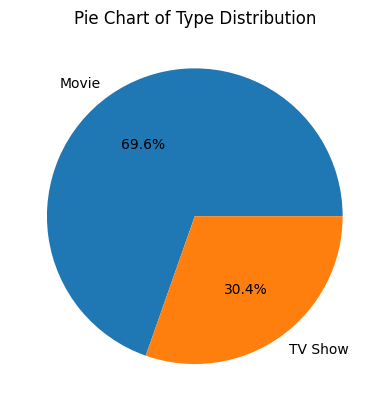

In [31]:
plt.pie(type_count, labels=type_count.index, autopct='%1.1f%%')
plt.title('Pie Chart of Type Distribution')

<Axes: xlabel='release_year'>

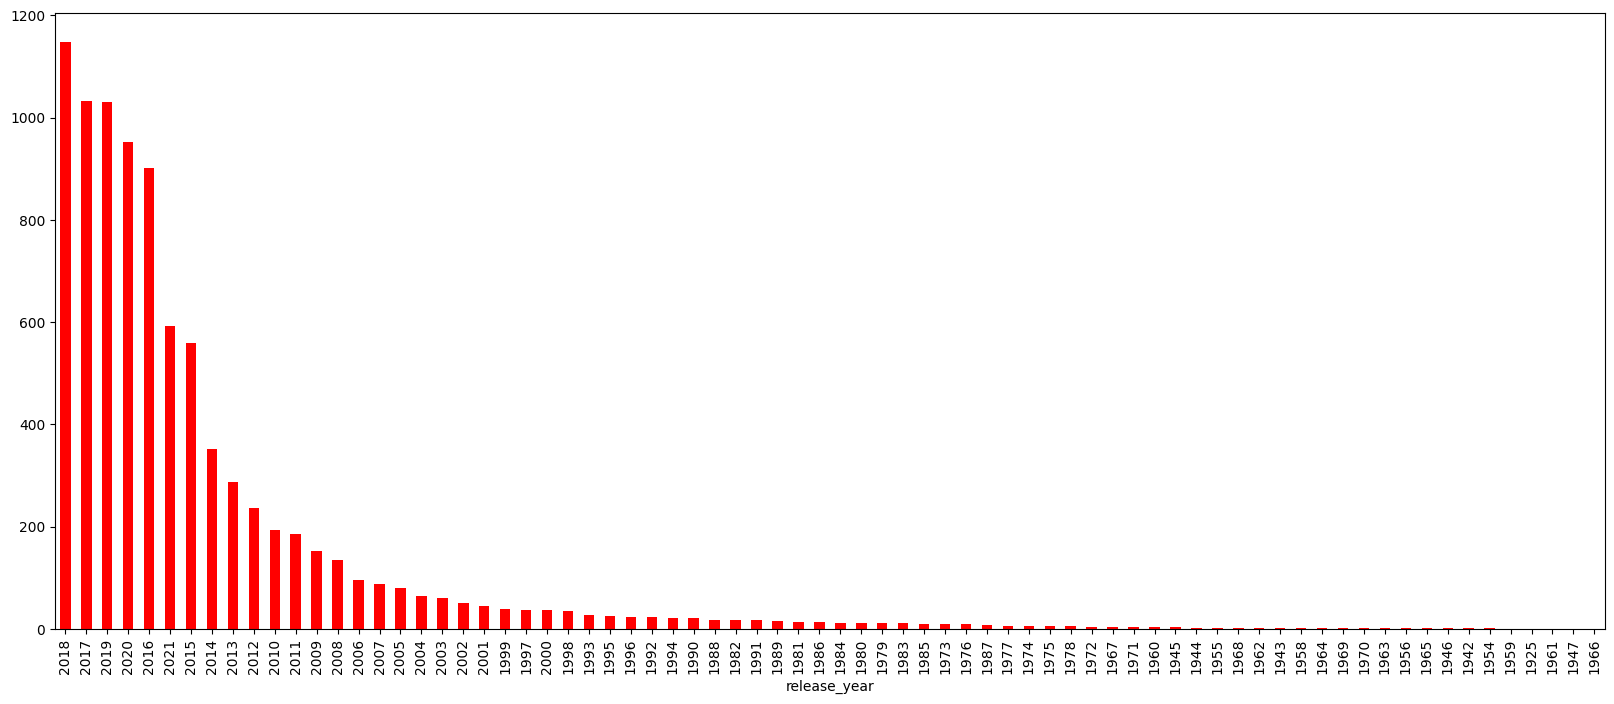

In [32]:
type_counts = df['release_year'].value_counts()
plt.figure(figsize=(20, 8))
type_counts.plot(kind='bar', color='red')


In [33]:
type_counts_by_year = df.groupby('release_year')['type'].value_counts()


<Axes: xlabel='release_year,type'>

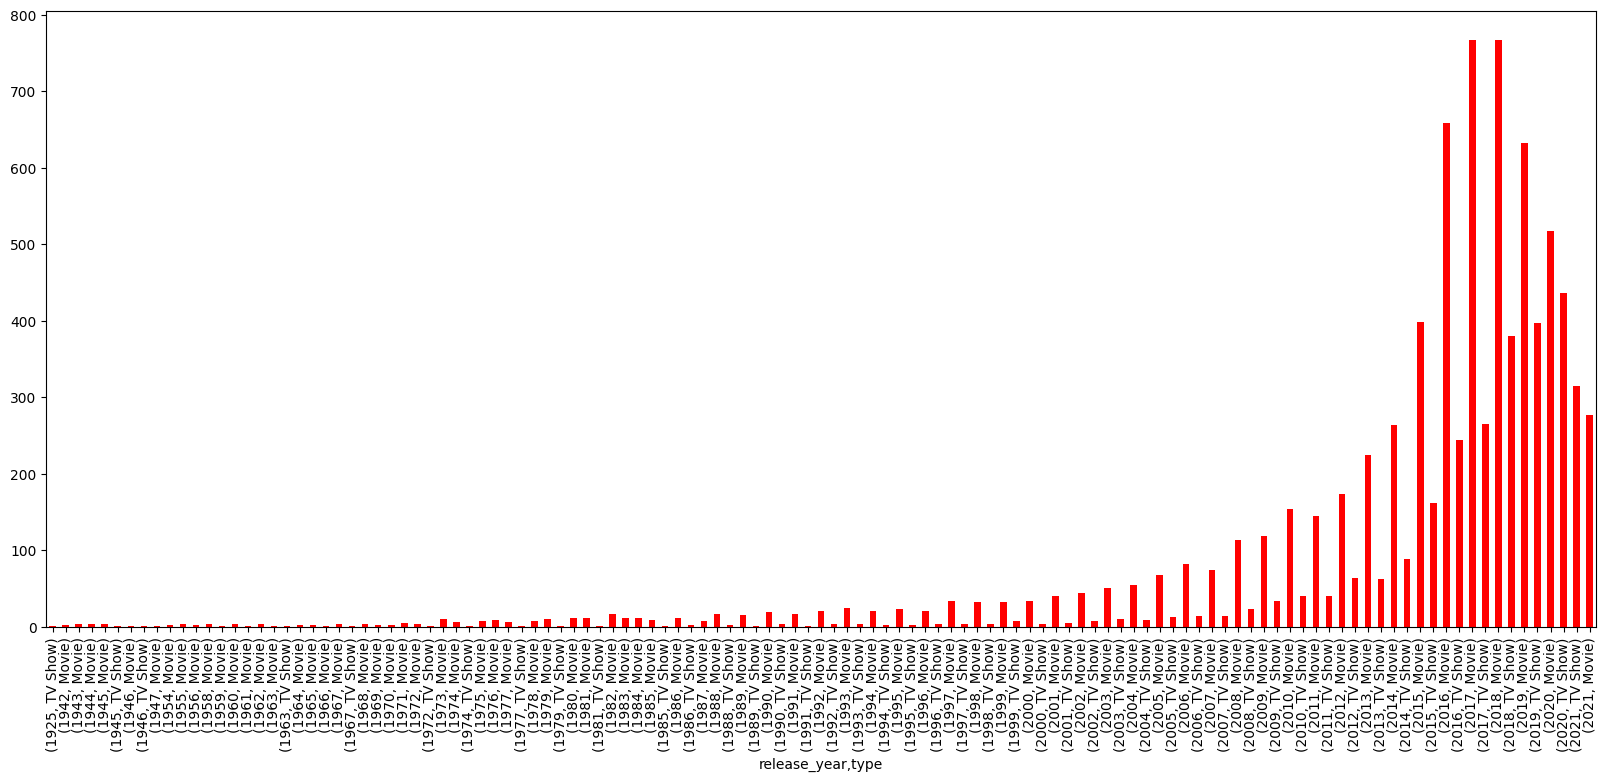

In [34]:
plt.figure(figsize=(20, 8))
type_counts_by_year.plot(kind='bar', color='red')


In [35]:
import numpy as np

# Define a function to split the country values
def split_list_in(x):
    if isinstance(x, str):  # Check if x is a string
        return x.split(',')[0]
    elif isinstance(x, float) and np.isnan(x):  # Check if x is NaN
        return np.nan
    else:
        return x  # Return the original value if it's not a string or NaN

# Apply the split_country function to the 'country' column
df_orig ['listed_in'] = df_orig ['listed_in'].apply(split_list_in)

In [36]:
orginal_listed_in_count=df_orig ["listed_in"].value_counts()
orginal_listed_in_count

listed_in
Dramas                          1600
Comedies                        1210
Action & Adventure               859
Documentaries                    829
International TV Shows           774
Children & Family Movies         605
Crime TV Shows                   399
Kids' TV                         388
Stand-Up Comedy                  334
Horror Movies                    275
British TV Shows                 253
Docuseries                       221
Anime Series                     176
International Movies             128
TV Comedies                      120
Reality TV                       120
Classic Movies                    80
TV Dramas                         67
Thrillers                         65
Movies                            57
TV Action & Adventure             40
Stand-Up Comedy & Talk Shows      34
Romantic TV Shows                 32
Classic & Cult TV                 22
Anime Features                    21
Independent Movies                20
Music & Musicals            

<Axes: xlabel='listed_in'>

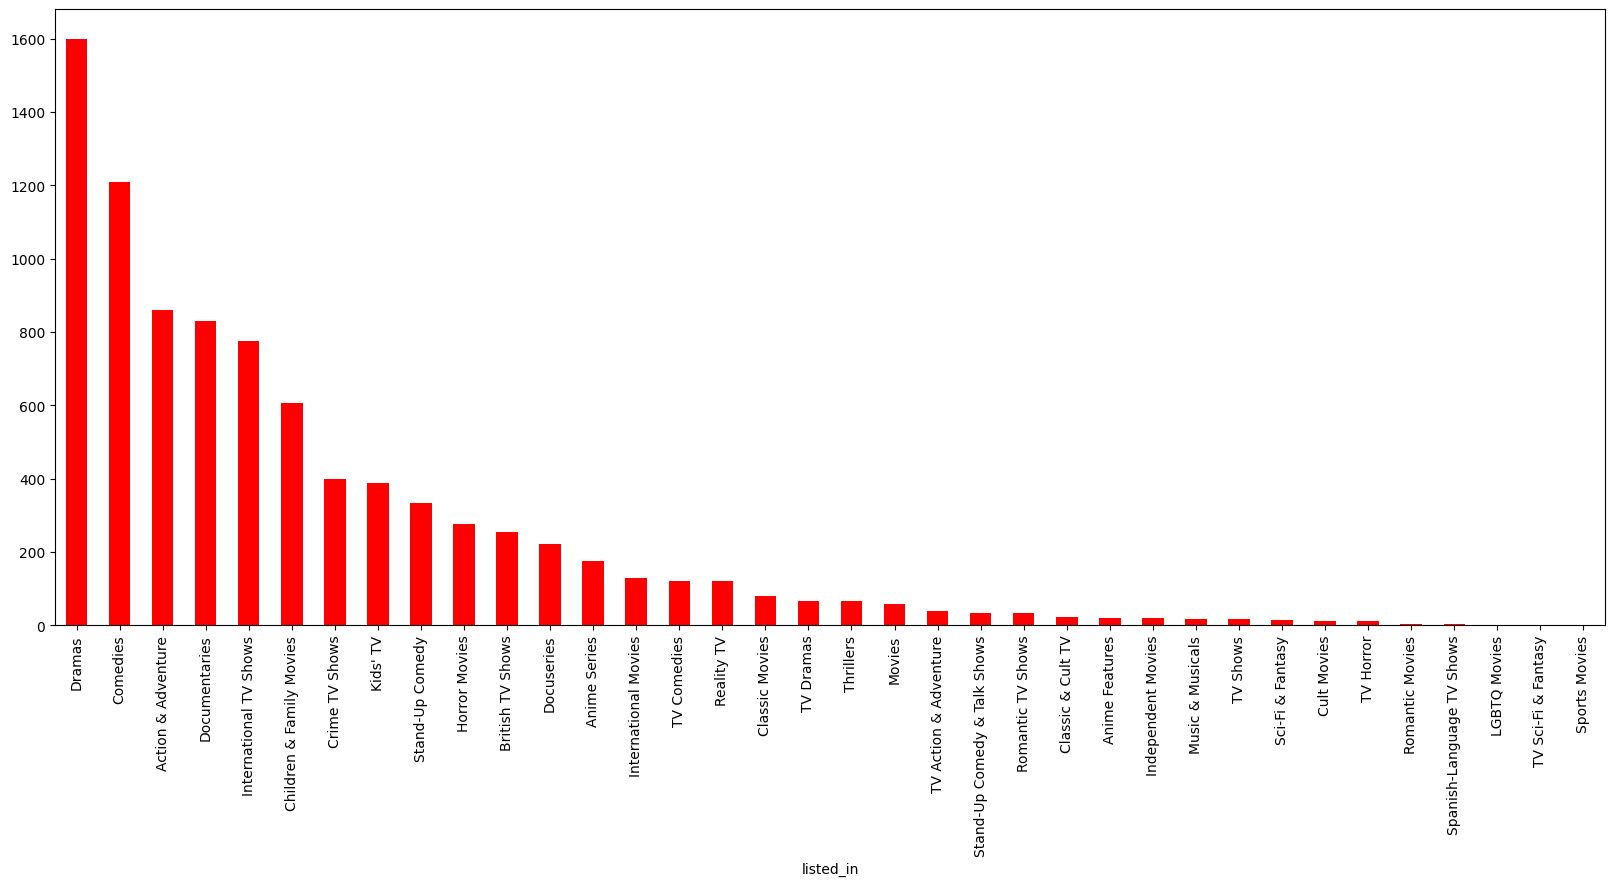

In [37]:
plt.figure(figsize=(20, 8))

orginal_listed_in_count.plot(kind='bar', color='red')

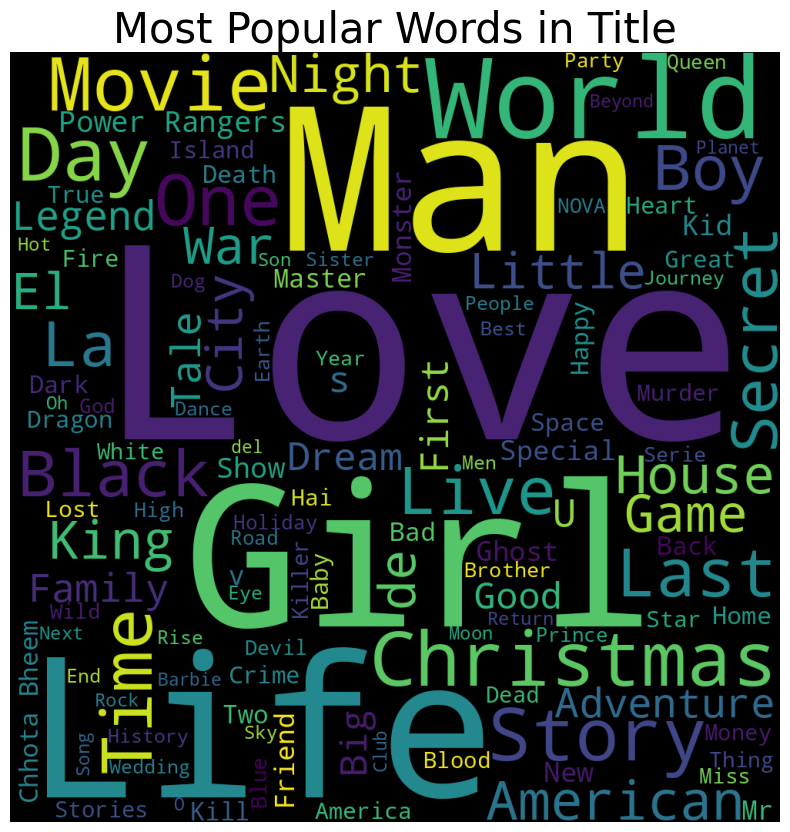

In [38]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'black', width = 1000,  height = 1000, max_words = 121).generate(' '.join(df['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in Title',fontsize = 30)
plt.show()

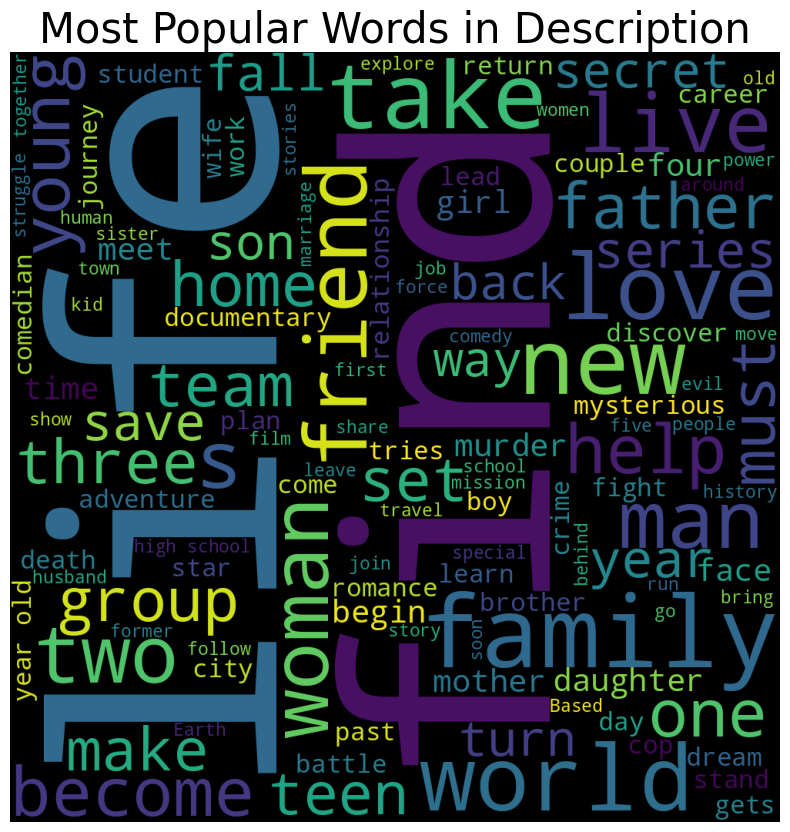

In [39]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'black', width = 1000,  height = 1000, max_words = 121).generate(' '.join(df['description']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in Description',fontsize = 30)
plt.show()

#Cleaning Data
1.Handling missing value

In [40]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [43]:
# handling missing values
df['director'] = df['director'].fillna('')
df['country'] = df['country'].fillna('')
df['cast'] = df['cast'].fillna('')
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
#df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df = df.dropna(subset=["duration"])
print('count of values')
print(df.isna().sum())

count of values
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


2.Changing "date_added" column type from object to datetime64[

In [44]:
df['date_added'] = pd.to_datetime(df['date_added'])

ValueError: time data " August 4, 2017" doesn't match format "%B %d, %Y", at position 1440. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

3.Deleting Duplicated rows

In [45]:
df.duplicated().sum()

0

#Handling outlier
rating column has outlier('84 min') & ('66 min') & ('74 min')& ( 'NR')& ("UR")
&'TV-Y7-FV' I have filtered data according to deleting outlier.

In [46]:

filtered_df = df[(df["rating"] != '84 min') & (df["rating"] != '66 min') & (df["rating"] != '74 min')& (df["rating"] != 'NR')& (df["rating"] != "UR")]

df = filtered_df
df.loc[df['rating'] == 'TV-Y7-FV', 'rating'] ='TV-Y7'


In [47]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17'], dtype=object)

In [48]:
country_count=df["rating"].value_counts()

<Axes: xlabel='rating'>

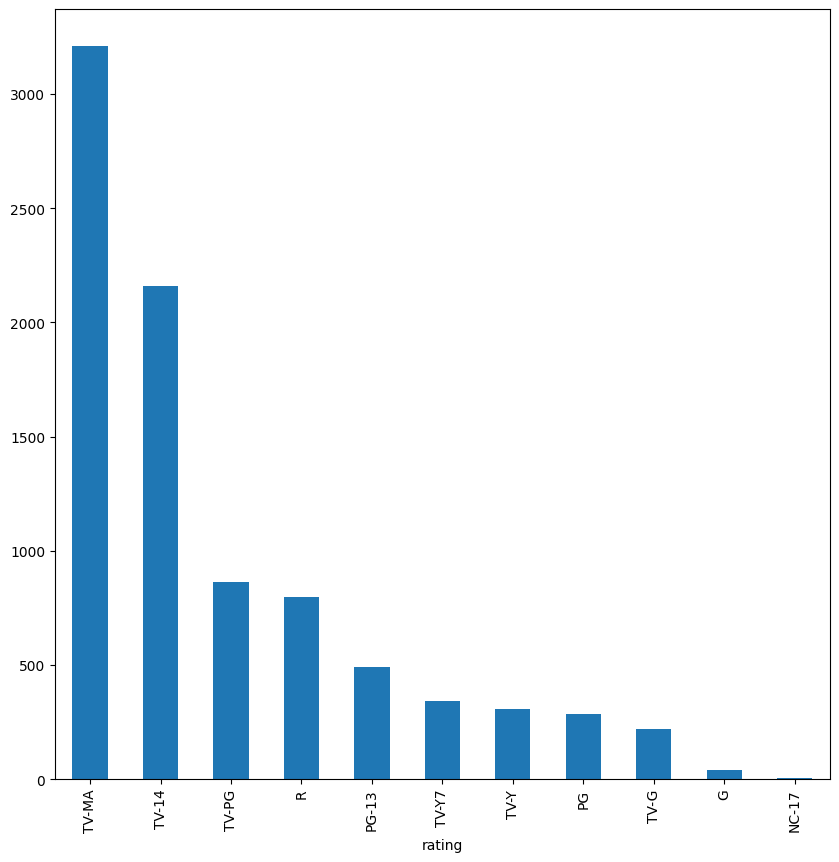

In [49]:
country_count.plot(kind="bar")

In [50]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,,,,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8721 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8721 non-null   object
 1   type          8721 non-null   object
 2   title         8721 non-null   object
 3   director      8721 non-null   object
 4   cast          8721 non-null   object
 5   country       8721 non-null   object
 6   date_added    8721 non-null   object
 7   release_year  8721 non-null   int64 
 8   rating        8721 non-null   object
 9   duration      8721 non-null   object
 10  listed_in     8721 non-null   object
 11  description   8721 non-null   object
dtypes: int64(1), object(11)
memory usage: 885.7+ KB


#Recommender Systems Content Base with variable "description"

In [52]:
df["description"].head()

0    As her father nears the end of his life, filmm...
1    After crossing paths at a party, a Cape Town t...
2    To protect his family from a powerful drug lor...
3    Feuds, flirtations and toilet talk go down amo...
4    In a city of coaching centers known to train I...
Name: description, dtype: object

In [53]:
df["description"] = df["description"].str.lower()

Constructing the required TF-IDF matrix by fitting and transforming the data
TF-IDF matrix has 8721 rows (each row corresponds to a movie or TV show) and 18791 columns (each column represents a unique word from the text data).

In [54]:

#Here, you import the TfidfVectorizer class from the sklearn.feature_extraction.text module. This class is used to convert a collection of raw documents into a matrix of TF-IDF features.
from sklearn.feature_extraction.text import TfidfVectorizer
#vector space model
tfidf = TfidfVectorizer(stop_words='english')

#Constructing the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(8721, 18791)

Importing linear_kernel: In this step, we import the linear_kernel function from the sklearn.metrics.pairwise module. The linear_kernel function is used to compute the cosine similarity between vectors.The cosine similarity measures the cosine of the angle between two vectors and is commonly used in text similarity tasks.it means that they have more similar if the cosine angle is 0.The linear_kernel function is applied to the TF-IDF matrix tfidf_matrix twice. This computes the dot product (inner product) between each pair of document vectors in tfidf_matrix, effectively calculating the cosine similarity between all pairs of documents.
The resulting cosine_sim matrix is a symmetric matrix where cosine_sim[i][j] represents the cosine similarity between document i and document j.
⟨a,b⟩=∥a∥⋅∥b∥⋅cos(θ)

In [55]:
#using the linear_kernel function from sklearn.metrics.pairwise to calculate cosine
from sklearn.metrics.pairwise import linear_kernel

#compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)

 this code creates a Series indices where each unique value in the 'title' column of DataFrame df is mapped to its corresponding index value from df.index. This mapping allows you to quickly look up the index of a row in df based on its 'title'.

In [56]:
indices = pd.Series(df.index, index = df['title']).drop_duplicates()

This Python function recommendations takes a movie title as input and returns the top 10 movies that are most similar to the input movie based on cosine similarity scores

In [72]:
import time
def recommendations(title, cosine_sim=cosine_sim):
    # Start measuring time
    start_time = time.time()

    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:11]
    print( "list of movie with their similarity score",sim_scores)

    movie_indices = [i[0] for i in sim_scores]

    # Calculate the time taken
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time for recommendations: {execution_time} seconds")

    return df['title'].iloc[movie_indices]


#Testing Recommender system

In [73]:
df["title"].head()

0     Dick Johnson Is Dead
1            Blood & Water
2                Ganglands
3    Jailbirds New Orleans
4             Kota Factory
Name: title, dtype: object

In [74]:
recommendations("Dick Johnson Is Dead")

list of movie with their similarity score [(4877, 0.16102017920204328), (1066, 0.14352025528398107), (7457, 0.1371404221774808), (5047, 0.12805188193404102), (5233, 0.12369876577144784), (5494, 0.11677448143647622), (2674, 0.11571068644781156), (4241, 0.11383322580446291), (4735, 0.11355455566009003), (2760, 0.11118397762039717)]
Execution time for recommendations: 0.012145757675170898 seconds


4877                                   End Game
1066                                   The Soul
7506                                       Moon
5047                    The Cloverfield Paradox
5233    The Death and Life of Marsha P. Johnson
5494                                   Kazoops!
2674                                      Alelí
4241                  Secrets in the Hot Spring
4735                     Tere Naal Love Ho Gaya
2760              Kannum Kannum Kollaiyadithaal
Name: title, dtype: object

As seen here, the first suggestion is listed in documentaries too, but their ratings are different. The best suggestion should pay attention to the rating. In the next model, I will try to incorporate the rating into the model

In [78]:
df[(df["title"] == "Dick Johnson Is Dead")|(df["title"] == "End Game") | (df["title"] == "The Soul")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"as her father nears the end of his life, filmm..."
1066,s1067,Movie,The Soul,Cheng Wei-hao,"Chang Chen, Janine Chang, Christopher Lee, Ank...","China, Taiwan","April 14, 2021",2021,TV-MA,130 min,"Dramas, International Movies, Thrillers",while investigating the death of a businessman...
4877,s4878,Movie,End Game,"Rob Epstein, Jeffrey Friedman",,United States,"May 4, 2018",2018,TV-PG,40 min,Documentaries,"facing an inevitable outcome, terminally ill p..."


Next Step is wite another program with more variables not just description. I made recommend system with this attributes "title","director","cast","listed_in","description". the steps of writting the algorithm is the same as first algorithm.

In [79]:
def data_clean(x):
      return str.lower(x)

In [80]:
filter_data=df[["title","director","cast","listed_in","description"]]


In [81]:
filter_data.head()

,title,director,cast,listed_in,description
0,Dick Johnson Is Dead,Kirsten Johnson,,Documentaries,"as her father nears the end of his life, filmm..."
1,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","International TV Shows, TV Dramas, TV Mysteries","after crossing paths at a party, a cape town t..."
2,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","Crime TV Shows, International TV Shows, TV Act...",to protect his family from a powerful drug lor...
3,Jailbirds New Orleans,,,"Docuseries, Reality TV","feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","International TV Shows, Romantic TV Shows, TV ...",in a city of coaching centers known to train i...


In [82]:
features= ["title","director","cast","listed_in","description"]

In [83]:
for feature in features:
   filter_data[feature]= filter_data[feature].apply(data_clean)

<ipython-input-83-da892f5c0307>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_data[feature]= filter_data[feature].apply(data_clean)
<ipython-input-83-da892f5c0307>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_data[feature]= filter_data[feature].apply(data_clean)
<ipython-input-83-da892f5c0307>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [84]:
filter_data.head()

,title,director,cast,listed_in,description
0,dick johnson is dead,kirsten johnson,,documentaries,"as her father nears the end of his life, filmm..."
1,blood & water,,"ama qamata, khosi ngema, gail mabalane, thaban...","international tv shows, tv dramas, tv mysteries","after crossing paths at a party, a cape town t..."
2,ganglands,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...","crime tv shows, international tv shows, tv act...",to protect his family from a powerful drug lor...
3,jailbirds new orleans,,,"docuseries, reality tv","feuds, flirtations and toilet talk go down amo..."
4,kota factory,,"mayur more, jitendra kumar, ranjan raj, alam k...","international tv shows, romantic tv shows, tv ...",in a city of coaching centers known to train i...


Changing to the columns to one column to compute cosine_similarity

In [85]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']
     #return  x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']
filter_data['soup'] = filter_data.apply(create_soup, axis=1)

<ipython-input-85-636f80b039af>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_data['soup'] = filter_data.apply(create_soup, axis=1)


In [86]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filter_data['soup'])



# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)



# Reset index of our main DataFrame and construct reverse mapping as before
filter_data=filter_data.reset_index()
indices = pd.Series(filter_data.index, index=filter_data['title'])

In [75]:
import time

def get_recommendations_new(title, cosine_sim=cosine_sim):
    # Start measuring time
    start_time = time.time()

    # title = title.replace(' ','').lower()  # Uncomment if needed
    title = title.lower()

    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:11]
    print( "list of movie with their similarity score",sim_scores)

    movie_indices = [i[0] for i in sim_scores]

    # Calculate the time taken
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time: {execution_time} seconds")

    return df['title'].iloc[movie_indices]

In [87]:
get_recommendations_new('Welcome', cosine_sim2)

list of movie with their similarity score [(4736, 0.3086066999241839), (5183, 0.2704813730373557), (6281, 0.2619047619047619), (6097, 0.2588414429342565), (8090, 0.25588315785957955), (8100, 0.2470831055537004), (6274, 0.242476692797573), (6988, 0.24247669279757295), (7538, 0.2417468892076141), (7778, 0.23904572186687872)]
Execution time: 0.01999807357788086 seconds


4736                 Thank You
5183                 Mubarakan
6296               Bhagam Bhag
6107                   Aitraaz
8161            Tees Maar Khan
8171                      Tezz
6289                   Bewafaa
7023    Humko Deewana Kar Gaye
7590                  No Entry
7837                     Ready
Name: title, dtype: object

In [ ]:
get_recommendations_new("Dick Johnson Is Dead", cosine_sim2)

Execution time: 0.008506298065185547 seconds


5233    The Death and Life of Marsha P. Johnson
7015                         How to Be a Player
5894                 Anjelah Johnson: Not Fancy
4877                                   End Game
5797                                   Extremis
3927                                   New Girl
3717                              Triple Threat
129                          An Unfinished Life
7622                                Nowhere Boy
5540                                 Win It All
Name: title, dtype: object

In [ ]:
df[(df["title"] == "Dick Johnson Is Dead")|(df["title"] == "The Death and Life of Marsha P. Johnson") | (df["title"] == "How to Be a Player")| (df["title"] == "Anjelah Johnson: Not Fancy")| (df["title"] == "Extremis")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"as her father nears the end of his life, filmm..."
5233,s5234,Movie,The Death and Life of Marsha P. Johnson,David France,,"Greece, United States",2017-10-06,2017,TV-MA,106 min,"Documentaries, LGBTQ Movies",as she fights the tide of violence against tra...
5797,s5798,Movie,Extremis,Dan Krauss,,United States,2016-09-13,2016,TV-PG,25 min,Documentaries,witness the wrenching emotions that accompany ...
5894,s5895,Movie,Anjelah Johnson: Not Fancy,Jay Karas,Anjelah Johnson-Reyes,United States,2015-10-02,2015,TV-14,64 min,Stand-Up Comedy,"the actress, comedian and youtube sensation ri..."
7015,s7016,Movie,How to Be a Player,Lionel C. Martin,"Bill Bellamy, Natalie Desselle, Lark Voorhies,...",United States,2019-11-01,1997,R,94 min,Comedies,dray lives life one woman at a time and is the...


In [ ]:
df[(df["title"] == "Dick Johnson Is Dead")|(df["title"] == "How to Be a Player") | (df["title"] == " Extremis")| (df["title"] == "End Game")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
4877,s4878,Movie,End Game,"Rob Epstein, Jeffrey Friedman",,United States,2018-05-04,2018,TV-PG,40 min,Documentaries,"Facing an inevitable outcome, terminally ill p..."
7015,s7016,Movie,How to Be a Player,Lionel C. Martin,"Bill Bellamy, Natalie Desselle, Lark Voorhies,...",United States,2019-11-01,1997,R,94 min,Comedies,Dray lives life one woman at a time and is the...


In [ ]:
get_recommendations_new("How to Be a Player", cosine_sim2)

0                                    Dick Johnson Is Dead
7365                        Mac & Devin Go to High School
149                                     I Got the Hook Up
144                                           House Party
6060                      A Thin Line Between Love & Hate
3908                                           About Time
5233              The Death and Life of Marsha P. Johnson
4851    Steve Martin and Martin Short: An Evening You ...
3927                                             New Girl
67                                      Saved by the Bell
Name: title, dtype: object